In [97]:
# Necessary Libraries and Functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report as rep
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [98]:
#Loading the datase
df = pd.read_csv("D:\\Work\\data science course\\final\\diabetic\\pima\\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
df.shape

(768, 9)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [104]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

1. Dataset Overview

Total Rows: 768

Total Columns: 9

Target Variable: Outcome (1 = Diabetic, 0 = Non-diabetic)

No Missing Values: However, some columns contain zero values, which may represent missing data.

In [105]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [106]:
#check the data types , nulls ratio and no of categories
d_types = df.dtypes
nulls_ratio = df.isnull().sum()/df.shape[0]
n_unique = df.nunique()
pd.DataFrame({'DTypes': d_types, 'Null_Ratio': nulls_ratio, 'Nunique': n_unique}).T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
DTypes,int64,int64,int64,int64,int64,float64,float64,int64,int64
Null_Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nunique,17,136,47,51,186,248,517,52,2


In [107]:
# check , Drop or handle duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


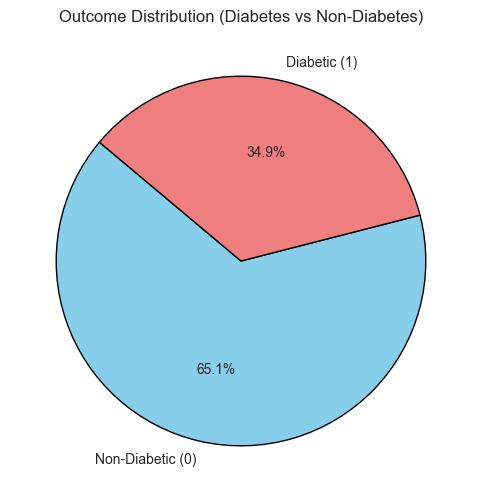

,count,Ratio
Outcome,,
0,500,65.104167
1,268,34.895833


In [108]:
#distribution of outcome
import matplotlib.pyplot as plt

# Count the number of occurrences for each outcome
outcome_counts = df["Outcome"].value_counts()

# Define labels and colors
labels = ["Non-Diabetic (0)", "Diabetic (1)"]
colors = ["skyblue", "lightcoral"]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Outcome Distribution (Diabetes vs Non-Diabetes)")
plt.show()
pd.DataFrame({'count': df["Outcome"].value_counts(), 'Ratio': df["Outcome"].value_counts()*100/len(df)})


In [109]:
# Identify all numerical (non-binary) features for outlier analysis
numerical_features = df.select_dtypes(include=["number"]).columns.drop("Outcome")
print(numerical_features)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


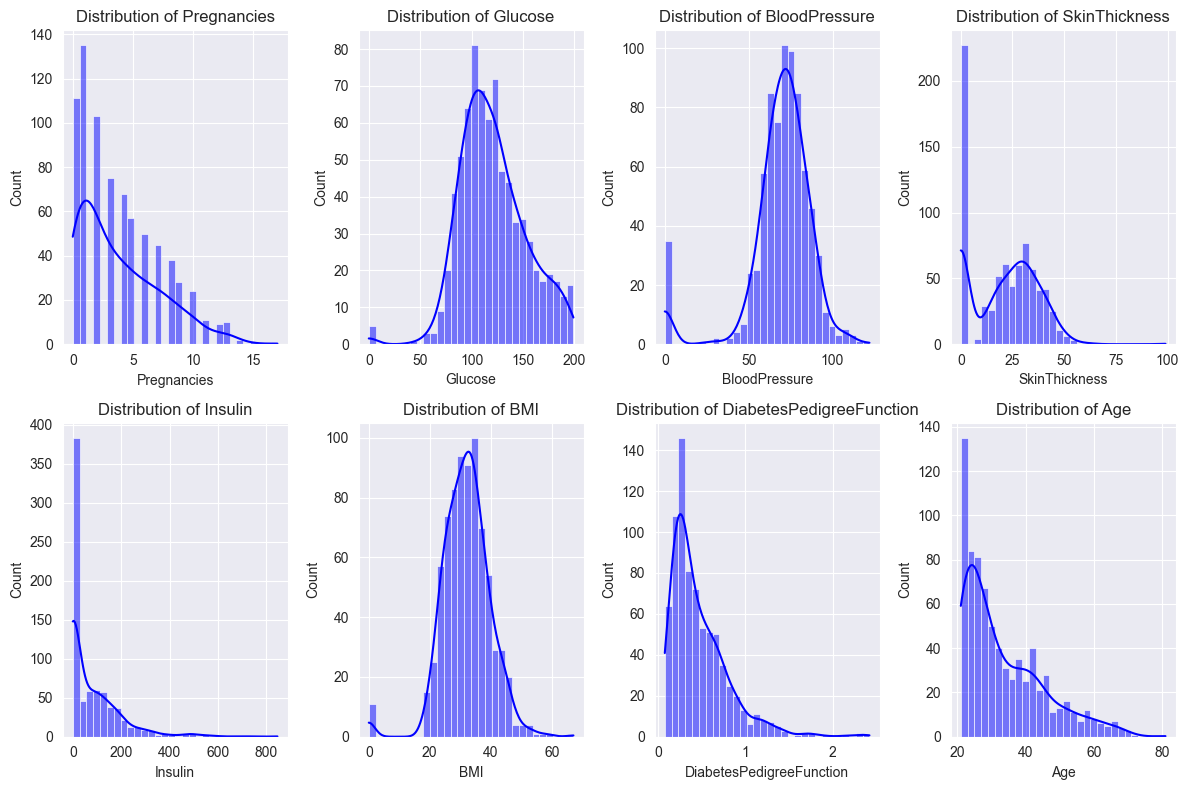

In [110]:
# Plot histograms for numerical features using a loop
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2,4, i)
    sns.histplot(df[feature], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


Distribution Analysis:

Most features exhibit right-skewed distributions, particularly Pregnancies, Insulin, and DiabetesPedigreeFunction.
Age has a wide range (21 to 81 years), with a median around 29.
The Outcome (Diabetes Status) is imbalanced, with fewer diabetic cases (34.9% positive cases).

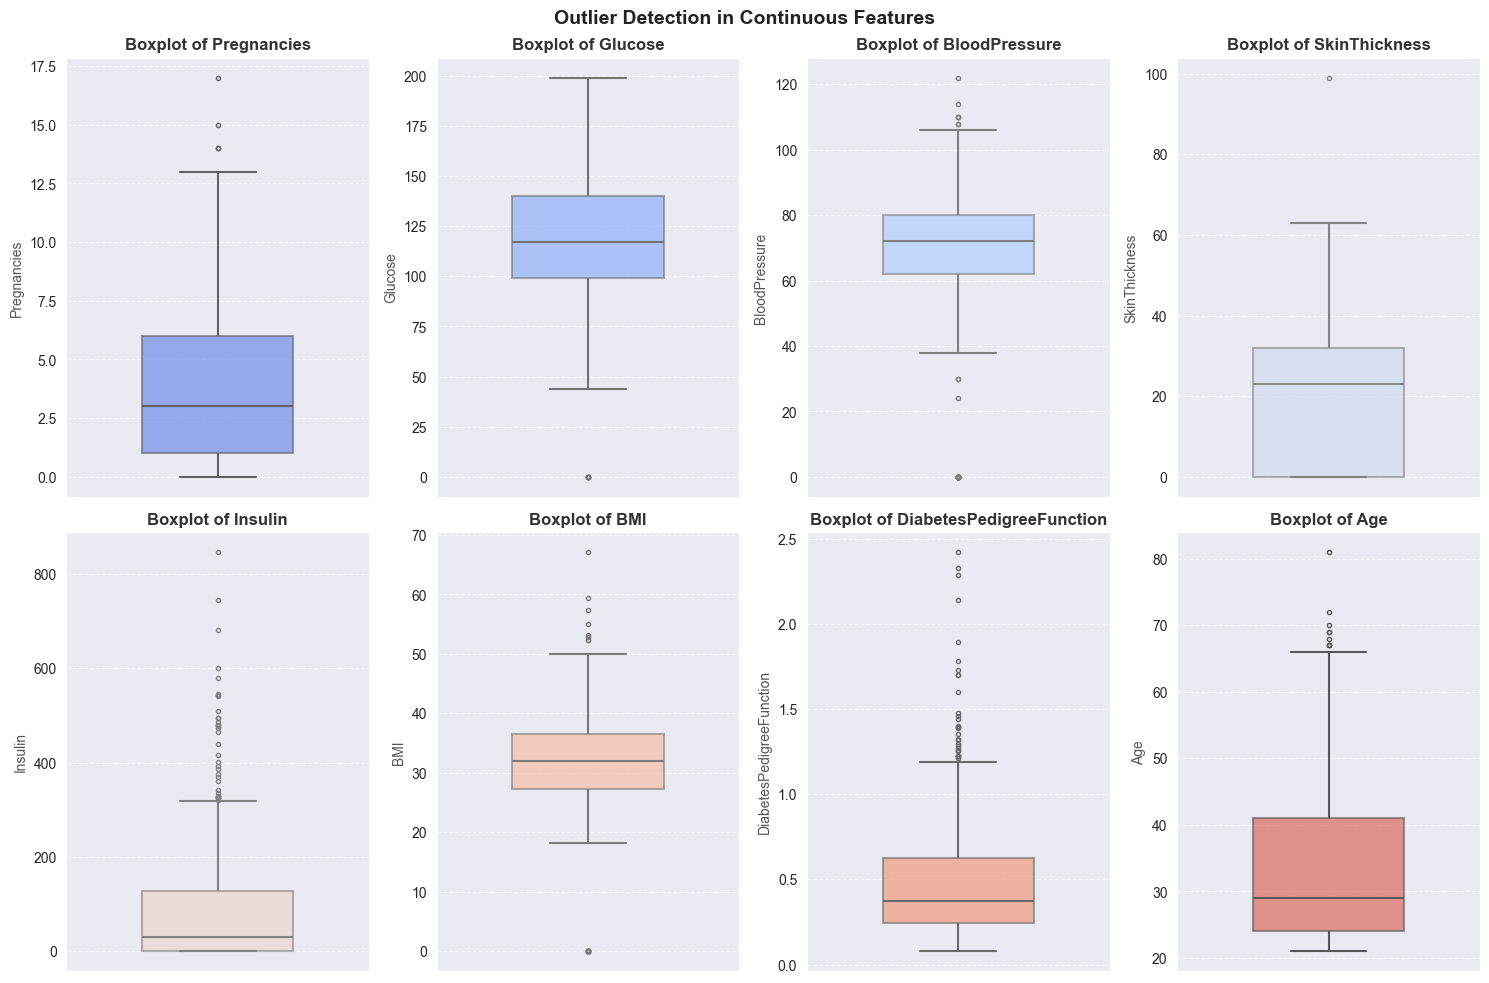

In [111]:
# Boxplot for detecting outliers for continuous columns

plt.figure(figsize=(15,10))
palette = sns.color_palette("coolwarm", len(numerical_features))  # Custom color palette

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[feature], color=palette[i - 1], linewidth=1.5, fliersize=3, width=0.5,
                boxprops=dict(facecolor=palette[i - 1], alpha=0.6))

    # Custom styling
    plt.title(f"Boxplot of {feature}", fontsize=12, fontweight="bold", color="#333333")
    plt.ylabel(feature, fontsize=10, color="#555555")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

# Improve layout
plt.suptitle("Outlier Detection in Continuous Features", fontsize=14, fontweight="bold", color="#222222")
plt.tight_layout()
plt.show()


Boxplot Analysis:
Glucose: Diabetic individuals have significantly higher glucose levels.
Blood Pressure: The distribution is similar for both groups, with a slight increase in diabetics.
BMI: Higher BMI is associated with diabetes, but there is some overlap.
Age: Older individuals tend to be more diabetic.
Insulin: Diabetic individuals show more variation in insulin levels.
Pregnancies: More pregnancies are associated with a higher likelihood of diabetes.

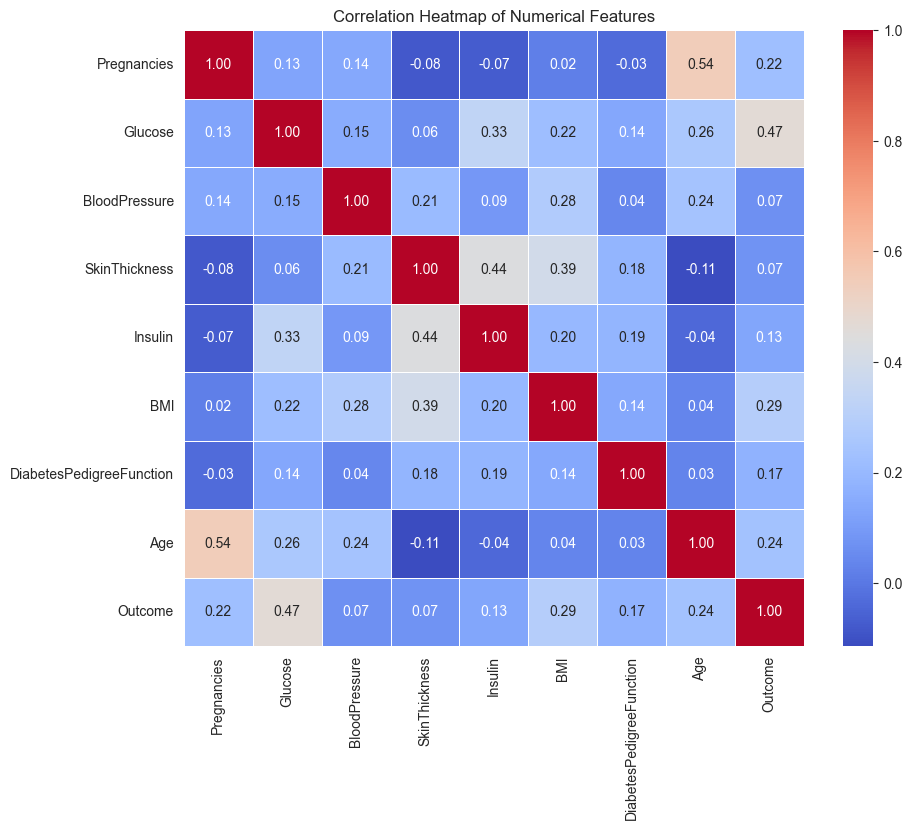

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [112]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
# Draw heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
# Calculate correlation with 'diabetes' column
df.corrwith(df["Outcome"]).sort_values(ascending=False)

Correlation Analysis:
Strong Correlations:

Glucose and Outcome (0.47): Higher glucose levels are positively correlated with diabetes.
Age and Pregnancies (0.54): Older individuals tend to have had more pregnancies.
BMI and SkinThickness (0.43): Higher BMI values are associated with greater skin thickness.
Weak Correlations:

BloodPressure, Insulin, and DiabetesPedigreeFunction show weak correlations with Outcome, suggesting they may not be strong predictors independently.

In [113]:
def target_summary_with_num(dataframe, target, numerical_features):
    """
    Summarizes the relationship between a numerical column and the target variable by calculating the mean.
    """
# Group by the target variable and calculate the mean of the numerical column for each target value
    print(dataframe.groupby(target).agg({numerical_features: "mean"}), end="\n\n\n")

In [114]:
for col in numerical_features:
    target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0           3.298000
1           4.865672


            Glucose
Outcome            
0        109.980000
1        141.257463


         BloodPressure
Outcome               
0            68.184000
1            70.824627


         SkinThickness
Outcome               
0            19.664000
1            22.164179


            Insulin
Outcome            
0         68.792000
1        100.335821


               BMI
Outcome           
0        30.304200
1        35.142537


         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500


               Age
Outcome           
0        31.190000
1        37.067164




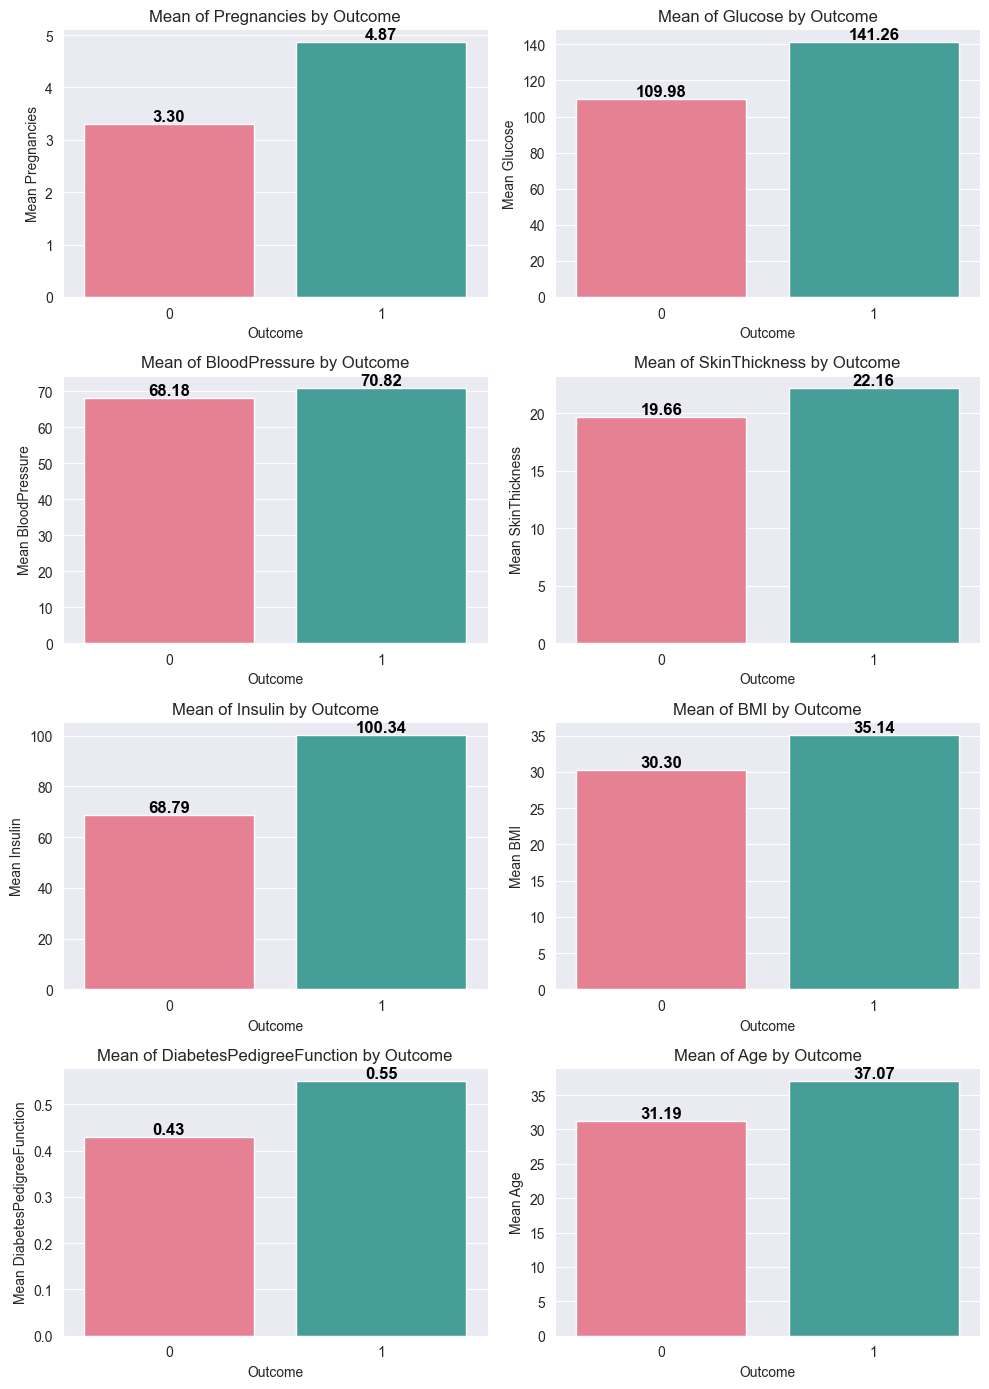

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean of numerical columns grouped by Outcome
mean_values = df.groupby("Outcome").mean()

# Plot bar charts with mean value annotations
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 14))
axes = axes.flatten()

for i, col in enumerate(mean_values.columns):
    ax = axes[i]
    sns.barplot(x=mean_values.index, y=mean_values[col], ax=ax, palette="husl")

    # Annotate the mean values on the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

    ax.set_title(f"Mean of {col} by Outcome")
    ax.set_xlabel("Outcome")
    ax.set_ylabel(f"Mean {col}")

plt.tight_layout()
plt.show()


In [116]:
df[numerical_features] = df[numerical_features].replace(0, np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [117]:
#handle the missing values
def median_target(var):
    temp = df[df[var].notnull()]
    return temp.groupby('Outcome')[var].median()  # Return Series instead of resetting index

columns = df.columns.drop("Outcome")

for i in columns:
    medians = median_target(i)  # Get medians as a Series
    df.loc[(df['Outcome'] == 0) & df[i].isnull(), i] = medians[0]  # Fill missing values for Outcome=0
    df.loc[(df['Outcome'] == 1) & df[i].isnull(), i] = medians[1]  # Fill missing values for Outcome=1

''' replace missing values in each feature column with the median of that feature, based on the Outcome value:
If the Outcome is 0, missing values in column i are replaced with the median value for non-diabetic individuals.
If the Outcome is 1, missing values in column i are replaced with the median value for diabetic individuals.
'''


In [118]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


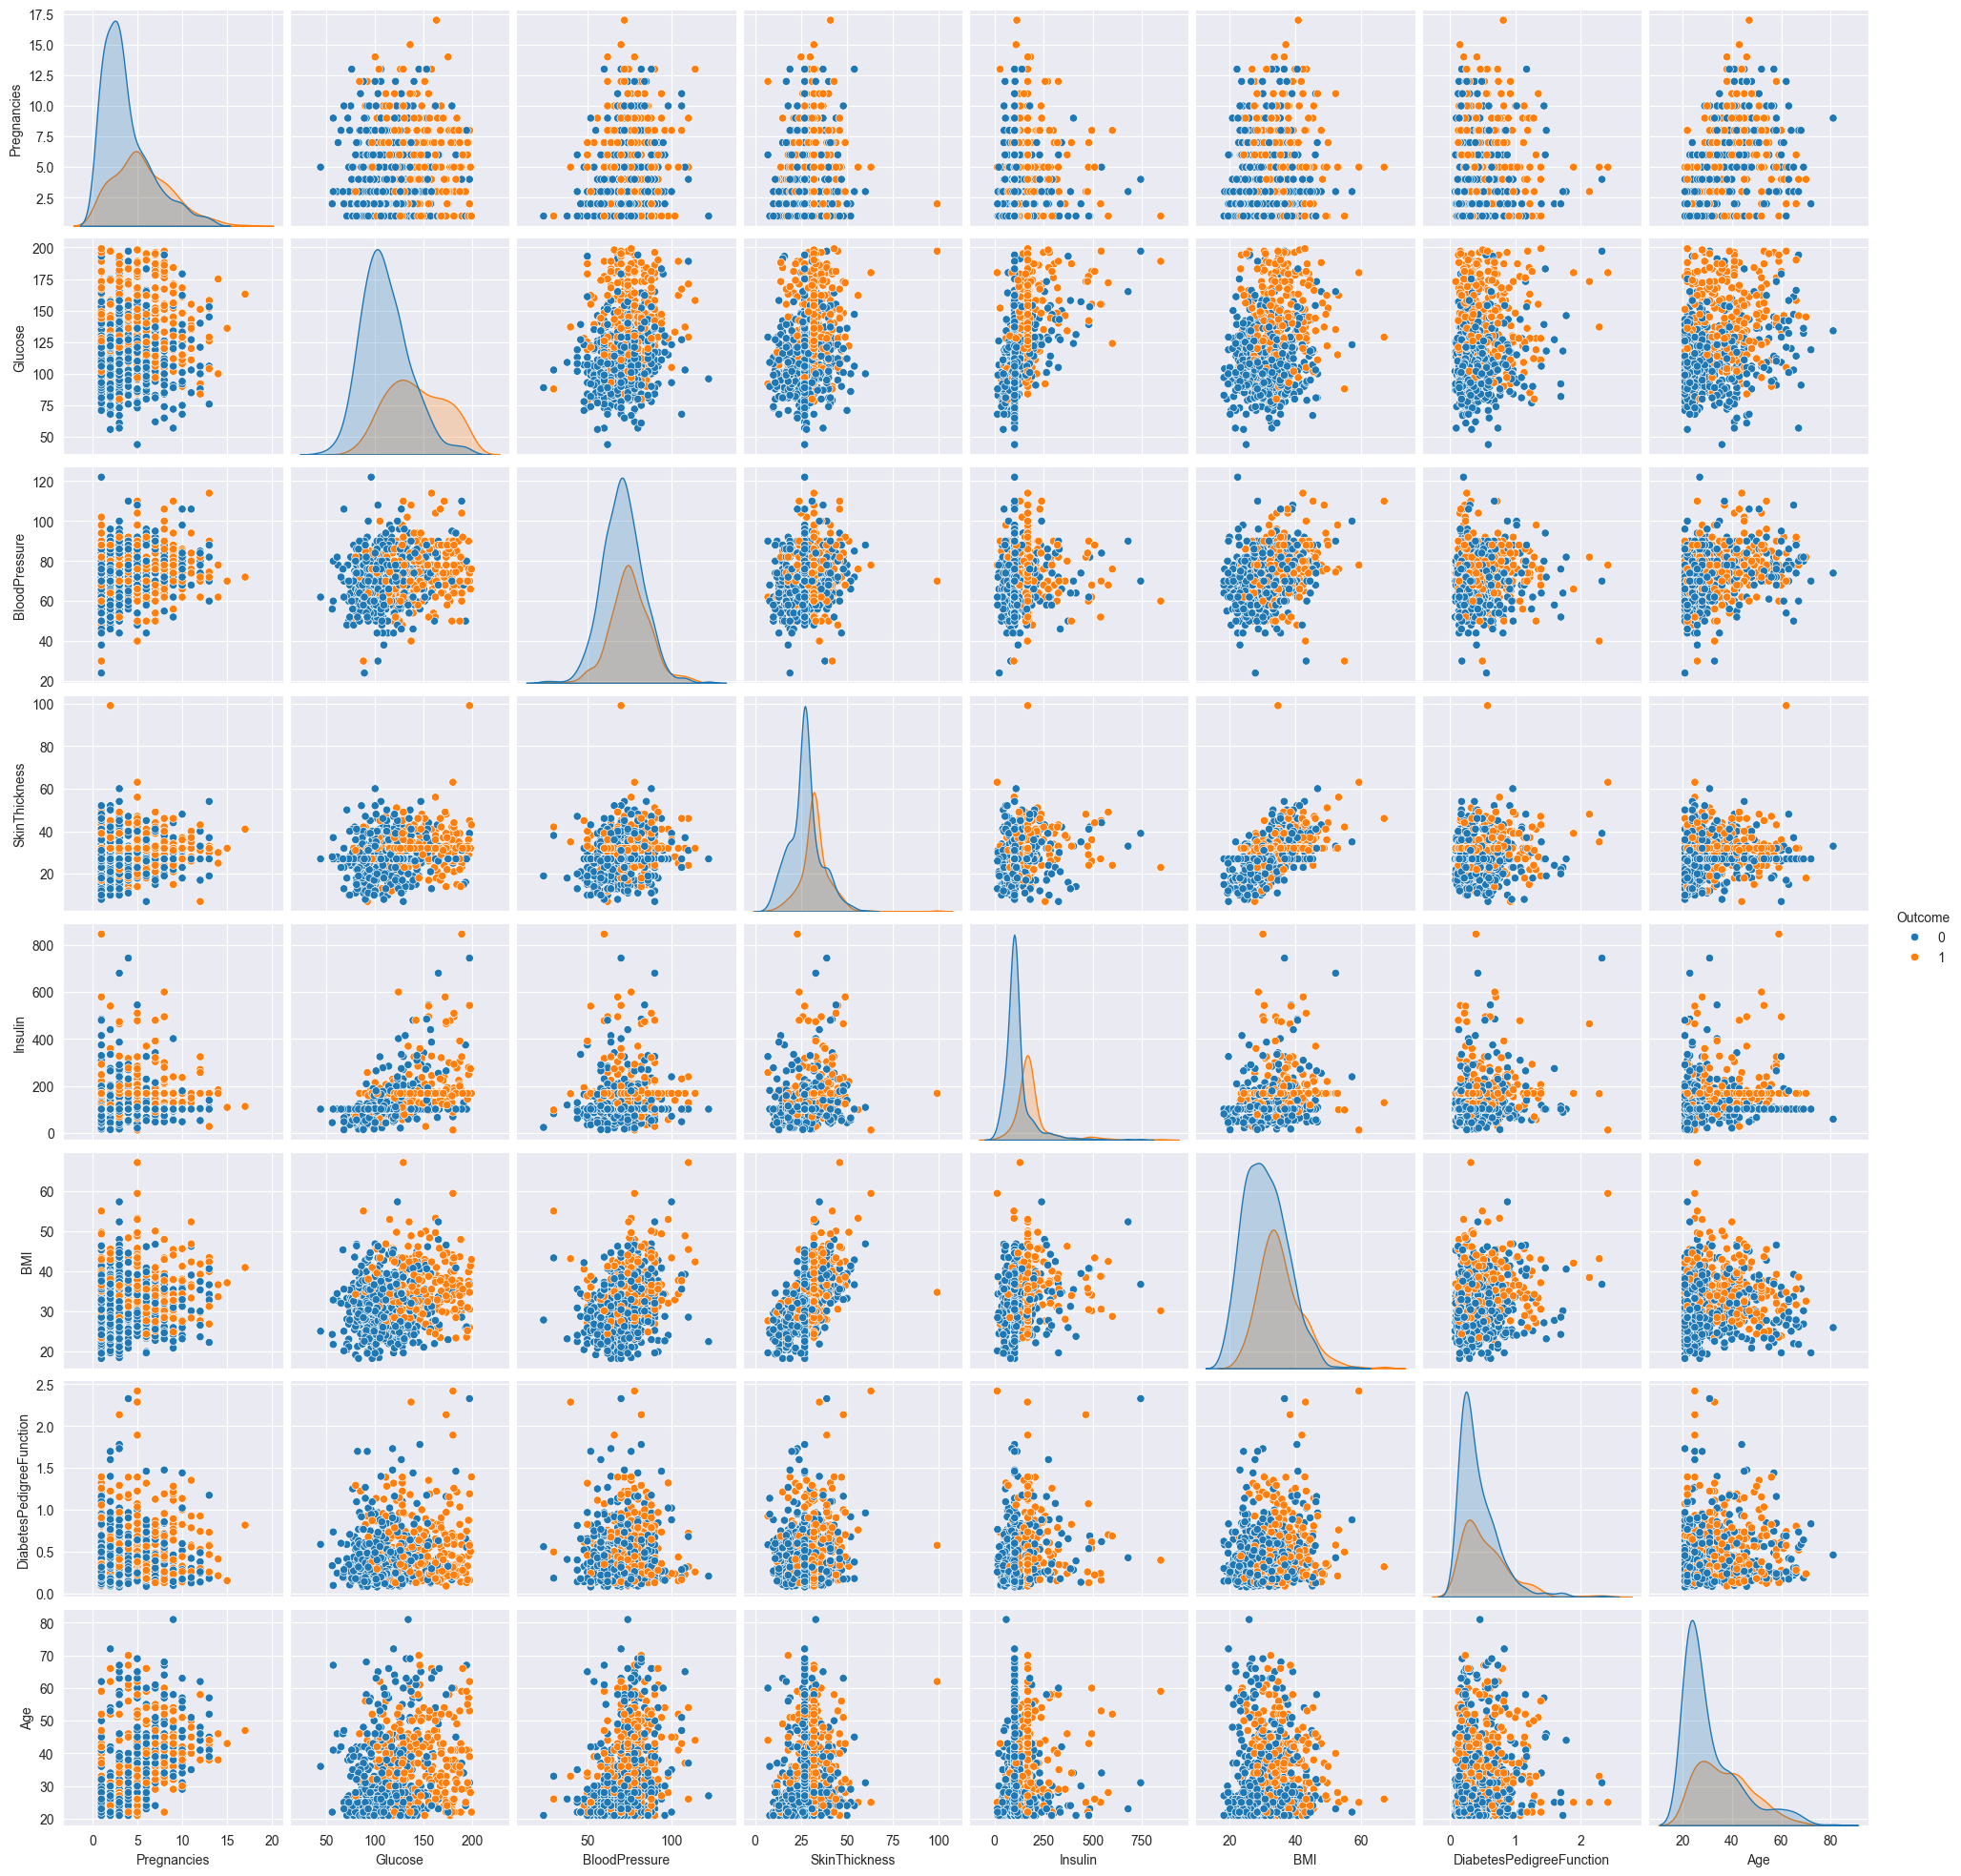

In [119]:
#pairplot for continuous features
sns.pairplot(df, hue="Outcome")

In [120]:
#handle outliers
for column in numerical_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(Q1,Q3,IQR, lower_bound,upper_bound)
    df[column] = np.clip(df[column], lower_bound, upper_bound )


2.0 6.0 4.0 -4.0 12.0
99.75 140.25 40.5 39.0 201.0
64.0 80.0 16.0 40.0 104.0
25.0 32.0 7.0 14.5 42.5
102.5 169.5 67.0 2.0 270.0
27.5 36.6 9.100000000000001 13.849999999999998 50.25
0.24375 0.62625 0.38249999999999995 -0.32999999999999996 1.2
24.0 41.0 17.0 -1.5 66.5


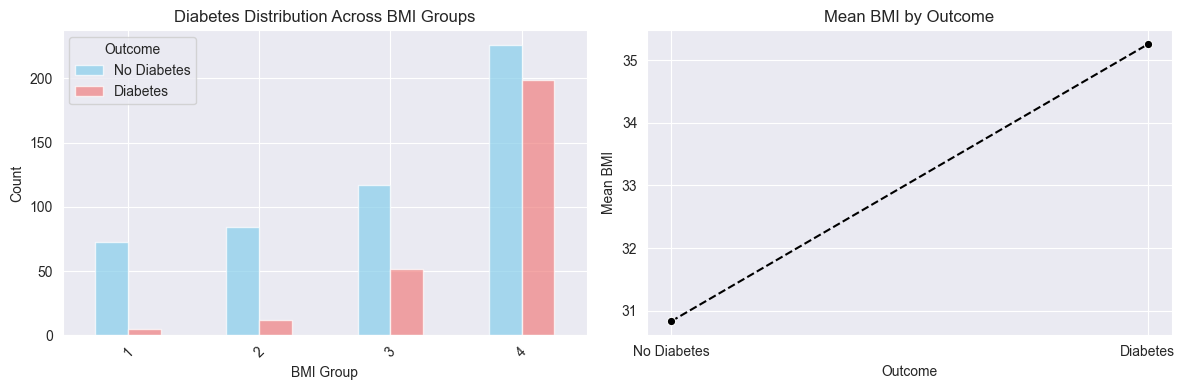

In [121]:
#bmi vs outcome
# Define BMI Categories
bmi_bins = [0, 12, 24, 27, 31, 67]  # Underweight, Normal, Overweight, Obese, Severely Obese
df["BMIGroup"] = pd.cut(df["BMI"], bins=bmi_bins, labels=False)

# Grouped count for bar plot
diabetes_counts = df.groupby(["BMIGroup", "Outcome"])["Outcome"].count().unstack()

# Line plot data: Mean BMI per outcome
bmi_outcome_avg = df.groupby("Outcome")["BMI"].mean()

# Create figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# --------- Bar Plot (BMI Group vs Outcome Count) ---------
diabetes_counts.plot(kind="bar", ax=axes[0], color=["skyblue", "lightcoral"], alpha=0.7)
axes[0].set_title("Diabetes Distribution Across BMI Groups")
axes[0].set_xlabel("BMI Group")
axes[0].set_ylabel("Count")
axes[0].legend(title="Outcome", labels=["No Diabetes", "Diabetes"])
axes[0].tick_params(axis='x', rotation=45)

# --------- Line Plot (Mean BMI vs Outcome) ---------
sns.lineplot(x=bmi_outcome_avg.index, y=bmi_outcome_avg.values, ax=axes[1], color="black", marker="o", linestyle="--")
axes[1].set_title("Mean BMI by Outcome")
axes[1].set_xlabel("Outcome")
axes[1].set_ylabel("Mean BMI")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["No Diabetes", "Diabetes"])

# Adjust layout
plt.tight_layout()
plt.show()


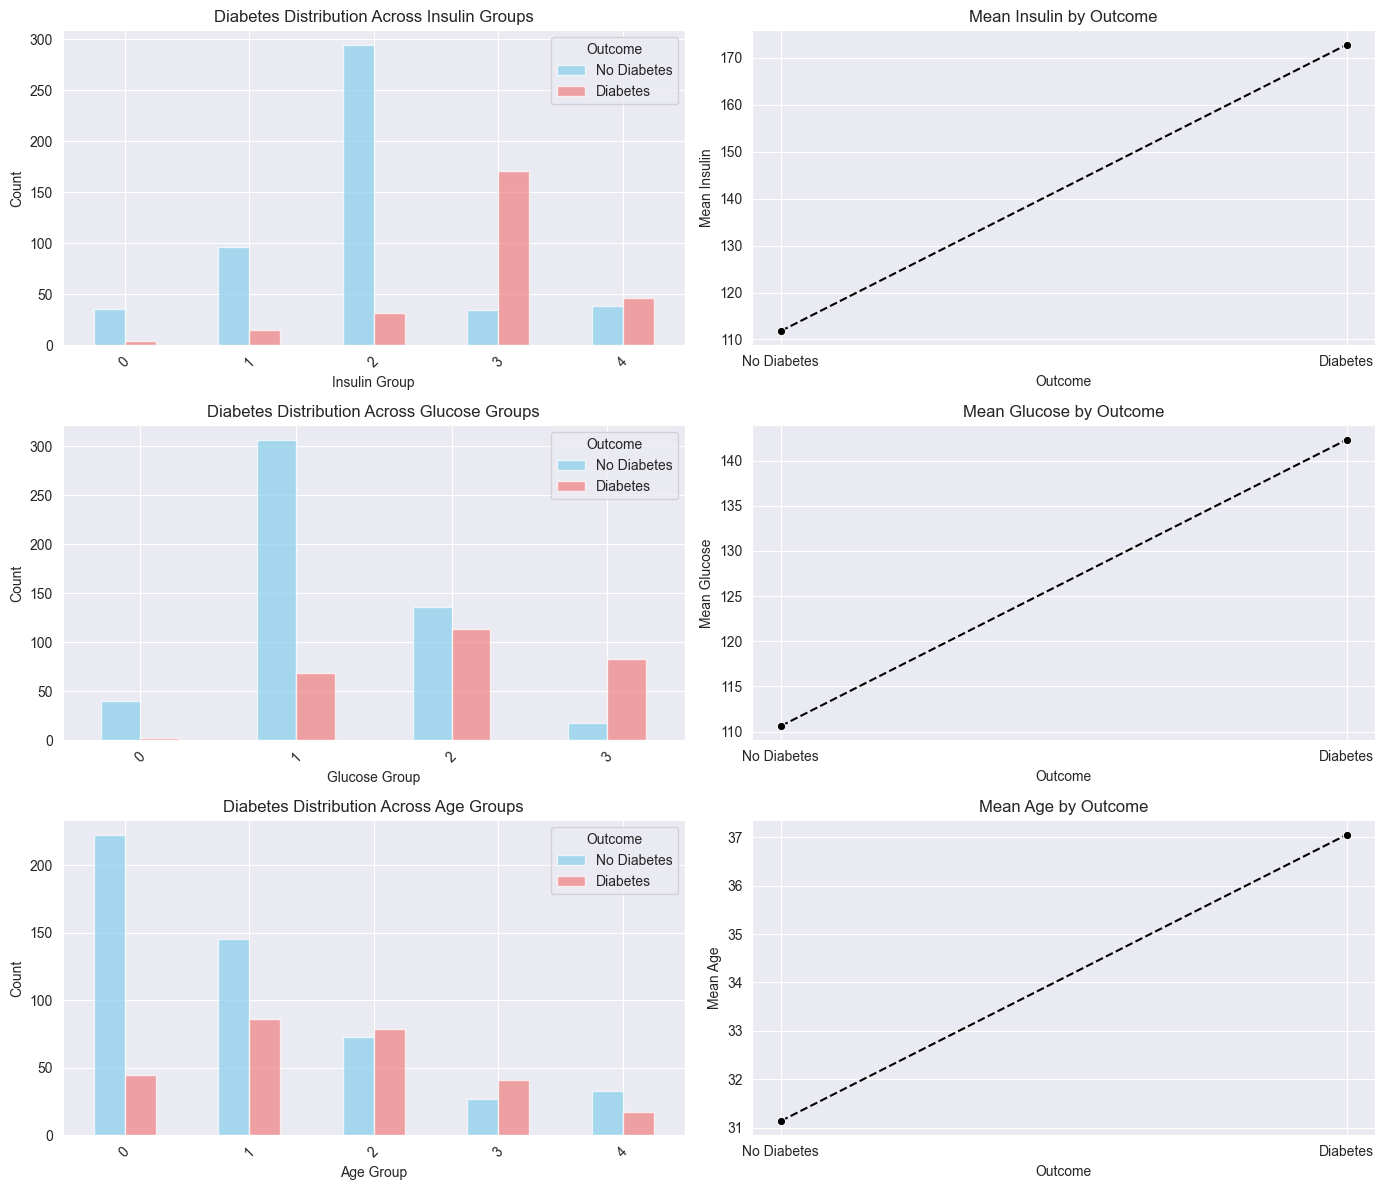

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins for Insulin, Glucose, and Age
insulin_bins = [0, 50, 100, 150, 200, 900]  # Example ranges for Insulin
glucose_bins = [0, 80, 120, 160, 200, 300]  # Example ranges for Glucose
age_bins = [0, 25, 35, 45, 55, 100]  # Example ranges for Age

# Create new categorical bins in the dataset
df["InsulinGroup"] = pd.cut(df["Insulin"], bins=insulin_bins, labels=False)
df["GlucoseGroup"] = pd.cut(df["Glucose"], bins=glucose_bins, labels=False)
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=False)

# Grouped count for bar plots
insulin_counts = df.groupby(["InsulinGroup", "Outcome"])["Outcome"].count().unstack()
glucose_counts = df.groupby(["GlucoseGroup", "Outcome"])["Outcome"].count().unstack()
age_counts = df.groupby(["AgeGroup", "Outcome"])["Outcome"].count().unstack()

# Mean value per Outcome for line plots
insulin_mean = df.groupby("Outcome")["Insulin"].mean()
glucose_mean = df.groupby("Outcome")["Glucose"].mean()
age_mean = df.groupby("Outcome")["Age"].mean()

# Create figure with 3 columns (for Insulin, Glucose, and Age)
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# --------- Insulin Bar & Line Plot ---------
insulin_counts.plot(kind="bar", ax=axes[0, 0], color=["skyblue", "lightcoral"], alpha=0.7)
axes[0, 0].set_title("Diabetes Distribution Across Insulin Groups")
axes[0, 0].set_xlabel("Insulin Group")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(title="Outcome", labels=["No Diabetes", "Diabetes"])
axes[0, 0].tick_params(axis='x', rotation=45)

sns.lineplot(x=insulin_mean.index, y=insulin_mean.values, ax=axes[0, 1], color="black", marker="o", linestyle="--")
axes[0, 1].set_title("Mean Insulin by Outcome")
axes[0, 1].set_xlabel("Outcome")
axes[0, 1].set_ylabel("Mean Insulin")
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(["No Diabetes", "Diabetes"])

# --------- Glucose Bar & Line Plot ---------
glucose_counts.plot(kind="bar", ax=axes[1, 0], color=["skyblue", "lightcoral"], alpha=0.7)
axes[1, 0].set_title("Diabetes Distribution Across Glucose Groups")
axes[1, 0].set_xlabel("Glucose Group")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(title="Outcome", labels=["No Diabetes", "Diabetes"])
axes[1, 0].tick_params(axis='x', rotation=45)

sns.lineplot(x=glucose_mean.index, y=glucose_mean.values, ax=axes[1, 1], color="black", marker="o", linestyle="--")
axes[1, 1].set_title("Mean Glucose by Outcome")
axes[1, 1].set_xlabel("Outcome")
axes[1, 1].set_ylabel("Mean Glucose")
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(["No Diabetes", "Diabetes"])

# --------- Age Bar & Line Plot ---------
age_counts.plot(kind="bar", ax=axes[2, 0], color=["skyblue", "lightcoral"], alpha=0.7)
axes[2, 0].set_title("Diabetes Distribution Across Age Groups")
axes[2, 0].set_xlabel("Age Group")
axes[2, 0].set_ylabel("Count")
axes[2, 0].legend(title="Outcome", labels=["No Diabetes", "Diabetes"])
axes[2, 0].tick_params(axis='x', rotation=45)

sns.lineplot(x=age_mean.index, y=age_mean.values, ax=axes[2, 1], color="black", marker="o", linestyle="--")
axes[2, 1].set_title("Mean Age by Outcome")
axes[2, 1].set_xlabel("Outcome")
axes[2, 1].set_ylabel("Mean Age")
axes[2, 1].set_xticks([0, 1])
axes[2, 1].set_xticklabels(["No Diabetes", "Diabetes"])

# Adjust layout
plt.tight_layout()
plt.show()


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Load dataset (assuming df is preprocessed)
X = df.drop(columns=["Outcome"])  # Features
y = df["Outcome"]  # Target variable

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42  , stratify=y)

# Compute balanced class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Computed Class Weights: {class_weight_dict}")

# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=["number"]).columns

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Computed Class Weights: {0: 0.7675, 1: 1.4345794392523366}


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy on Training Data: 0.8957

Test Accuracy: 0.8831

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       100
           1       0.85      0.81      0.83        54

    accuracy                           0.88       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154



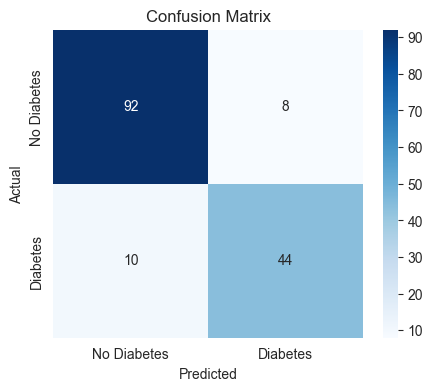

In [124]:
#1st try with Random Forest
# Define Random Forest model
rf = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],

}

# Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy on Training Data: {grid_search.best_score_:.4f}")

# Train final model using best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best Accuracy on Training Data: 0.8892

Test Accuracy: 0.8831

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       100
           1       0.85      0.81      0.83        54

    accuracy                           0.88       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154



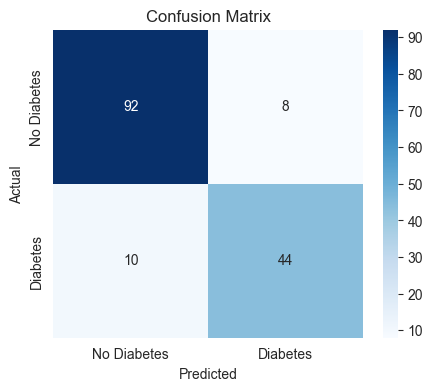

In [128]:
#2nd try with XGBoost
#define XGBoost model
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, class_weight=class_weight_dict)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}


# Grid Search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy on Training Data: {grid_search.best_score_:.4f}")
# Train final model using best parameters
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy on Training Data: 0.8665

Test Accuracy: 0.8701

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       100
           1       0.78      0.87      0.82        54

    accuracy                           0.87       154
   macro avg       0.85      0.87      0.86       154
weighted avg       0.88      0.87      0.87       154



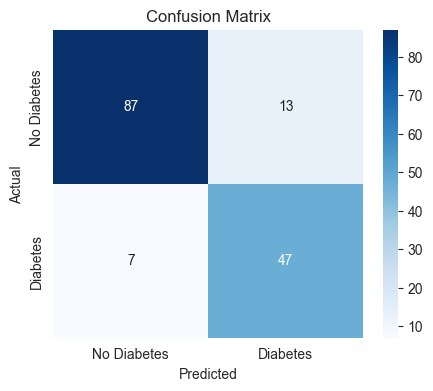

In [130]:
#try SVM model
# Define SVM model
svm_model = SVC(kernel="rbf", class_weight=class_weight_dict, random_state=42)

# Define hyperparameter grid
param_grid = {
    "C": [0.1, 1, 10, 100],  # Regularization parameter
    "gamma": ["scale", "auto", 0.01, 0.1, 1],  # Kernel coefficient
    "kernel": ["rbf"],  # Use RBF kernel
}

# Grid Search
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy on Training Data: {grid_search.best_score_:.4f}")

# Train final model using best parameters
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best Accuracy on Training Data: 0.8778

Test Accuracy: 0.8766

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       100
           1       0.83      0.81      0.82        54

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.86       154
weighted avg       0.88      0.88      0.88       154



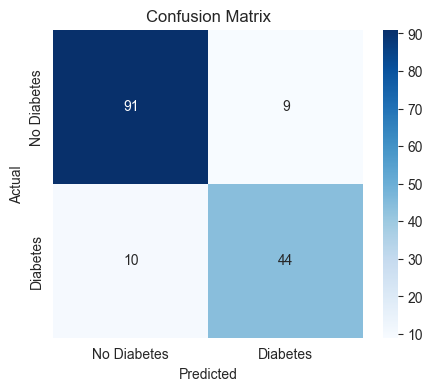

In [131]:
# try knn model
# Define KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Define hyperparameter grid
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],  # Number of neighbors
    "weights": ["uniform", "distance"],  # Weight function
    "metric": ["euclidean", "manhattan", "minkowski"],  # Distance metric
}

# Grid Search
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy on Training Data: {grid_search.best_score_:.4f}")

# Train final model using best parameters
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Here are all the attempts and results I have obtained could you please advice me which model to choose? and how to get better results
# Are these results considered as reasonable or not?